Importing Necessary Libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


Reading Dataset

In [100]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [101]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [102]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Converting Categorical values to Numerical Values

In [103]:
encoder=preprocessing.LabelEncoder()
df["gender"]=encoder.fit_transform(df["gender"])
df["smoking_history"]=encoder.fit_transform(df["smoking_history"])

In [104]:
df

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [105]:
df.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

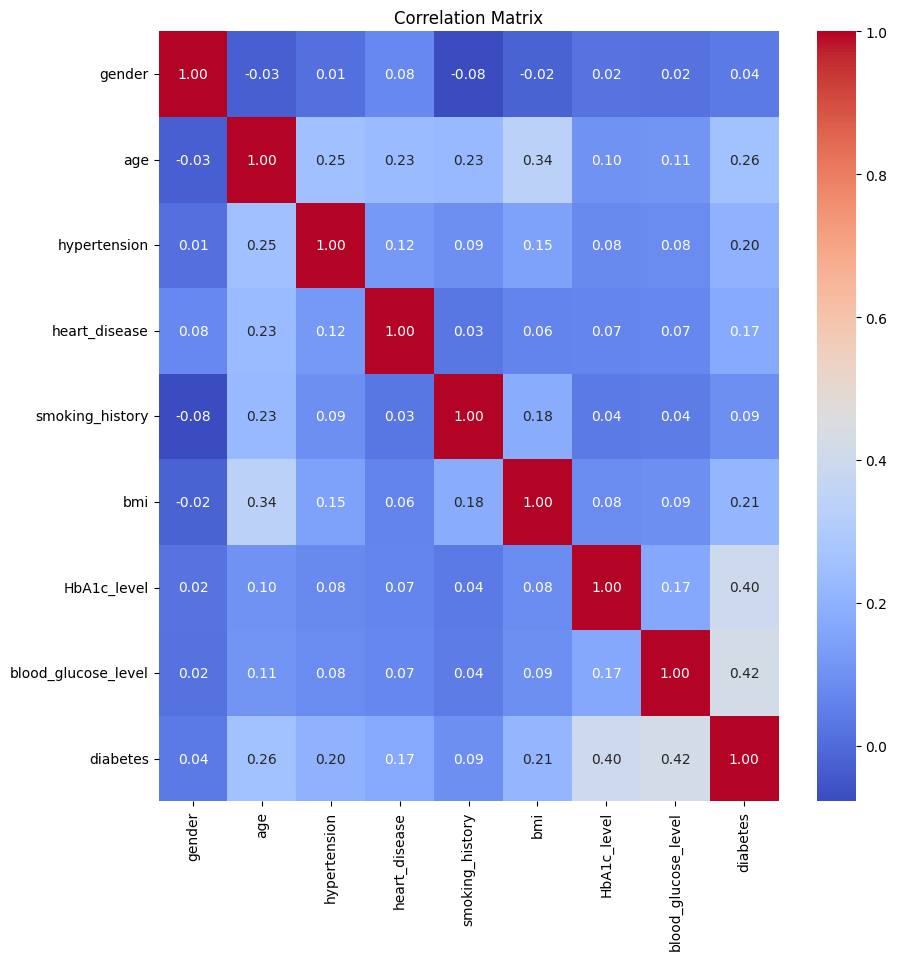

In [106]:
correlation_matrix=df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

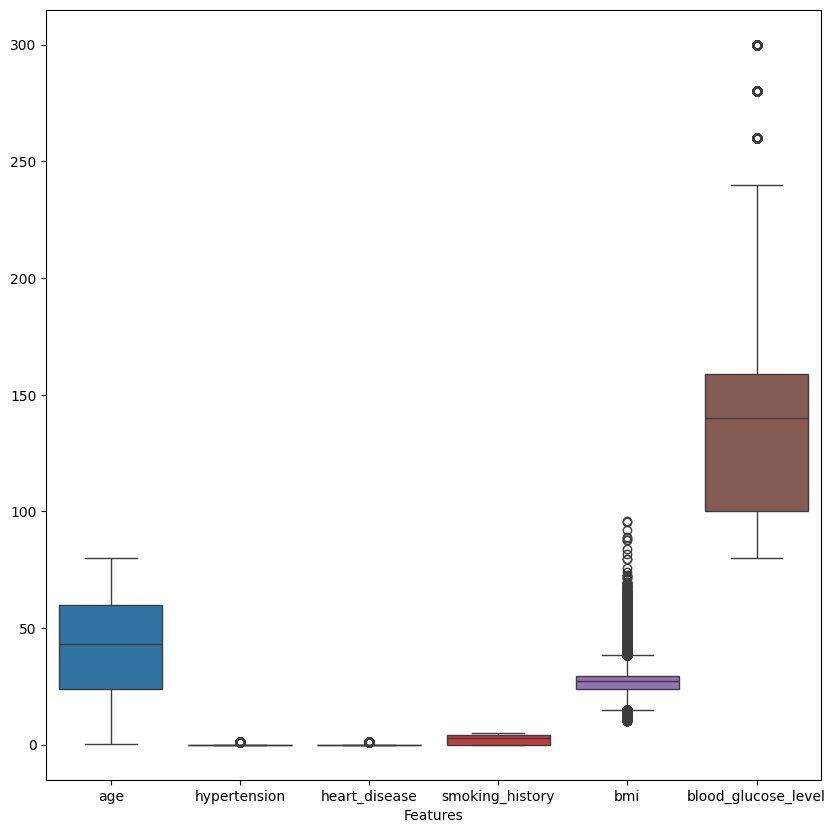

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["age","hypertension","heart_disease","smoking_history","bmi","blood_glucose_level"]])
plt.xlabel("Features")
plt.show()

Data Preprocessing

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


In [109]:
cols=["age","bmi","HbA1c_level","blood_glucose_level"]
normalizar=MinMaxScaler()
df[cols]=normalizar.fit_transform(df[cols])

In [110]:
df

gender       age  hypertension  heart_disease  smoking_history  \
0           0  1.000000             0              1                4   
1           0  0.674675             0              0                0   
2           1  0.349349             0              0                4   
3           0  0.449449             0              0                1   
4           1  0.949950             1              1                1   
...       ...       ...           ...            ...              ...   
99995       0  1.000000             0              0                0   
99996       0  0.024024             0              0                0   
99997       1  0.824825             0              0                3   
99998       0  0.299299             0              0                4   
99999       0  0.712212             0              0                1   

            bmi  HbA1c_level  blood_glucose_level  diabetes  
0      0.177171     0.563636             0.272727         0  
1      0.202031     0.563636             0.000000         0  
2      0.202031     0.400000             0.354545         0  
3      0.156863     0.272727             0.340909         0  
4      0.118231     0.236364             0.340909         0  
...         ...          ...                  ...       ...  
99995  0.202031     0.490909             0.045455         0  
99996  0.085901     0.545455             0.090909         0  
99997  0.207983     0.400000             0.340909         0  
99998  0.296569     0.090909             0.090909         0  
99999  0.144958     0.563636             0.045455         0  

[100000 rows x 9 columns]

In [148]:
x = df.drop(columns=["diabetes"])
y = df["diabetes"]

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Size of The Training Dataset : ",x_train.shape)
print("Size of The Testing Dataset  : ",x_test.shape)

Size of The Training Dataset :  (75000, 8)
Size of The Testing Dataset  :  (25000, 8)


Decision Tree Model Without Feature Selection

Decision Tree Using Gini Impurity

In [150]:
gini_decision_tree=DecisionTreeClassifier(criterion="gini",random_state=42)
gini_decision_tree.fit(x_train,y_train)
root_index=gini_decision_tree.tree_.feature[0]

print("\nThe Root of Gini Decision Tree is : ",x.columns[root_index],"\n")


The Root of Gini Decision Tree is :  HbA1c_level 



In [182]:
training_prediction=gini_decision_tree.predict(x_train)
accuracy13=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction is : ",100*accuracy13,"\n")
testing_prediction=gini_decision_tree.predict(x_test)
accuracy14=accuracy_score(y_test,testing_prediction)
print("\nThe accuracy of Testing Dataset is    : ",100*accuracy14,"\n")


The Accuracy of Training Prediction is :  99.932 


The accuracy of Testing Dataset is    :  95.27600000000001 



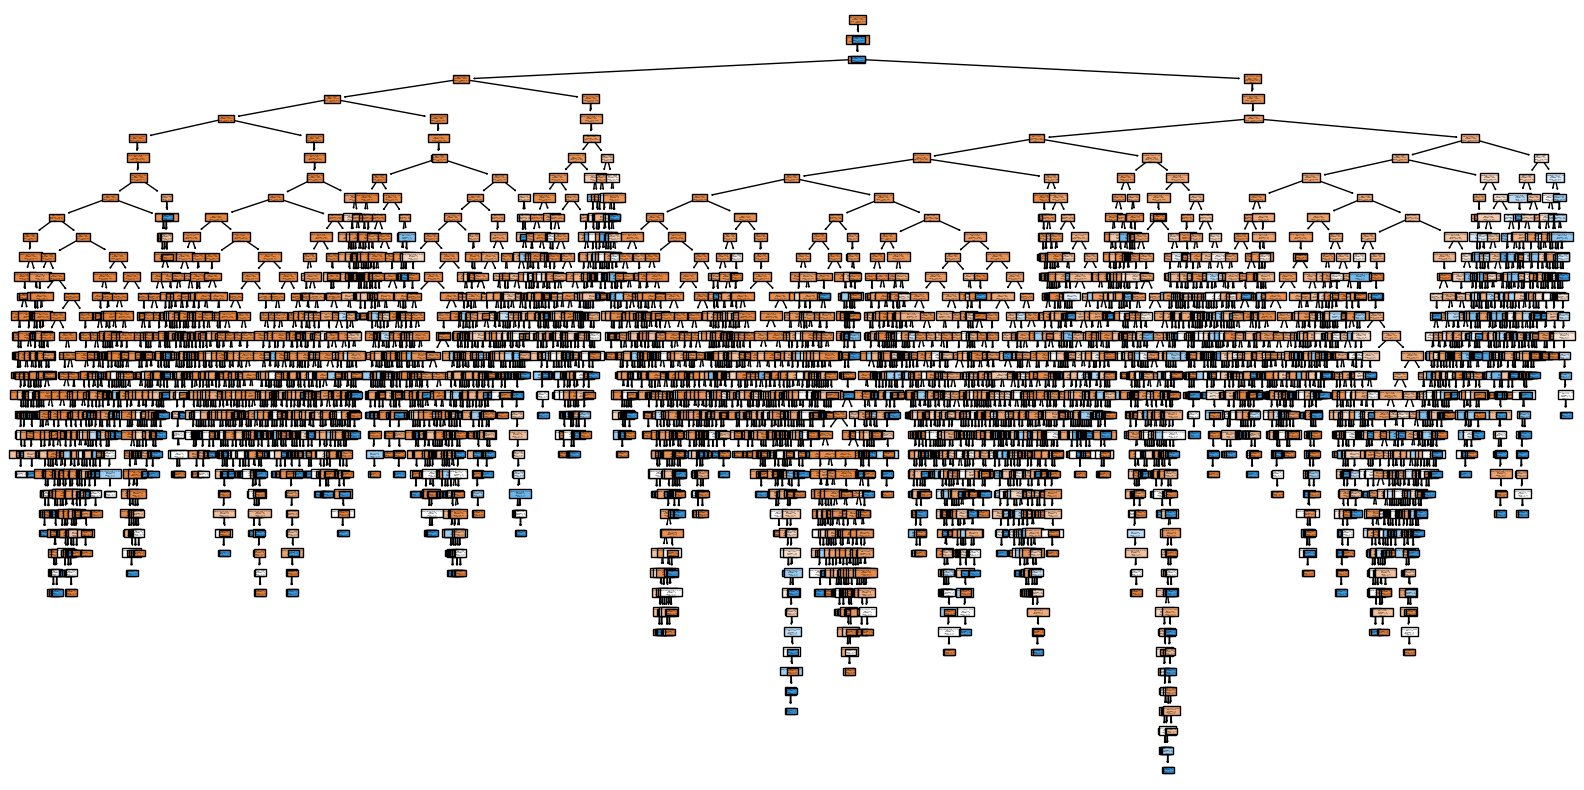

In [116]:
plt.figure(figsize=(20,10)) 
plot_tree(gini_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

Decision Tree Using Entropy

In [153]:
entropy_decision_tree=DecisionTreeClassifier(criterion="entropy",random_state=42)
entropy_decision_tree.fit(x_train,y_train)
root_index=entropy_decision_tree.tree_.feature[0]

print("\nThe Root of The Decision Tree is : ",x.columns[root_index],"\n")


The Root of The Decision Tree is :  HbA1c_level 



In [183]:
training_pediction=entropy_decision_tree.predict(x_train)
accuracy15=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction : ",accuracy15*100,"\n")
test_prediction=entropy_decision_tree.predict(x_test)
accuracy16=accuracy_score(y_test,test_prediction)
print("\nThe Accuracy of Testing Prediction : ",accuracy16*100,"\n")


The Accuracy of Training Prediction :  99.932 


The Accuracy of Testing Prediction :  95.304 



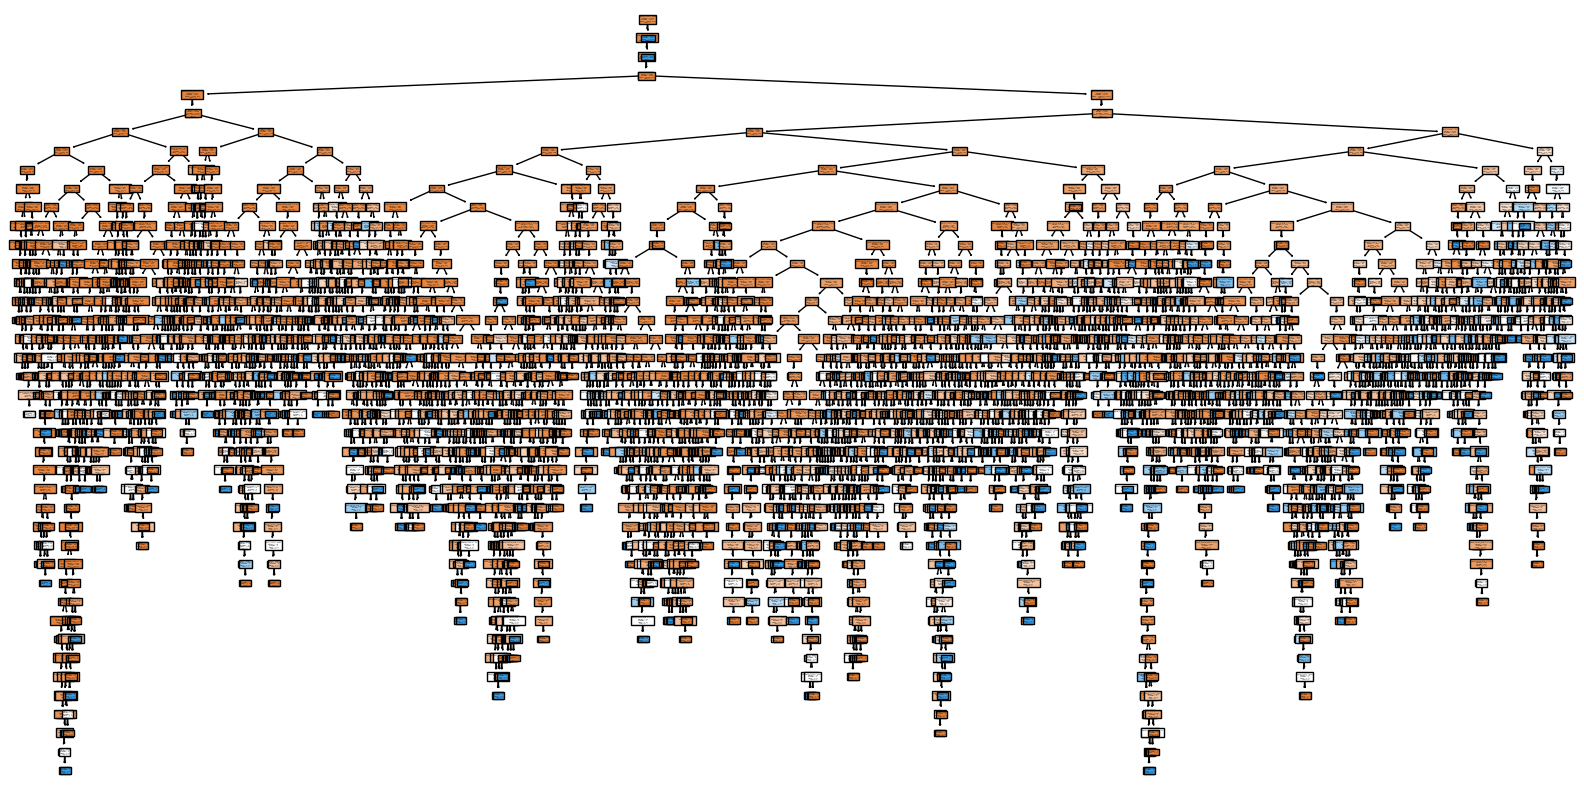

In [120]:
plt.figure(figsize=(20,10)) 
plot_tree(entropy_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

Decision Tree Model With Feature Selection

Feature Selection Techniques

     Select K Best  K=3
     Select K Best  K=4
     Select K Best  K=5     

Select K Best  K=3

In [121]:
test=SelectKBest(score_func=f_classif,k=3)
fit=test.fit(x,y)
np.set_printoptions(precision=10)
model=fit.transform(x)

selected_indices=fit.get_support(indices=True)
selected_features=df.columns[selected_indices]

print("The Selected Fratures are : ",selected_features)

The Selected Fratures are :  Index(['age', 'HbA1c_level', 'blood_glucose_level'], dtype='object')


In [122]:
x = df[selected_features]
y = df["diabetes"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Size of The Training Dataset : ",x_train.shape)
print("Size of The Testing Dataset  : ",x_test.shape)

Size of The Training Dataset :  (75000, 3)
Size of The Testing Dataset  :  (25000, 3)


In [123]:
gini_decision_tree=DecisionTreeClassifier(criterion="gini",random_state=42)
gini_decision_tree.fit(x_train,y_train)
root_index=gini_decision_tree.tree_.feature[0]

print("\nThe Root of Gini Decision Tree is : ",x.columns[root_index],"\n")

training_prediction=gini_decision_tree.predict(x_train)
accuracy1=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction is : ",100*accuracy1,"\n")

testing_prediction=gini_decision_tree.predict(x_test)
accuracy2=accuracy_score(y_test,testing_prediction)
print("\nThe accuracy of Testing Dataset is    : ",100*accuracy2,"\n")


The Root of Gini Decision Tree is :  HbA1c_level 


The Accuracy of Training Prediction is :  97.32266666666666 


The accuracy of Testing Dataset is    :  96.952 



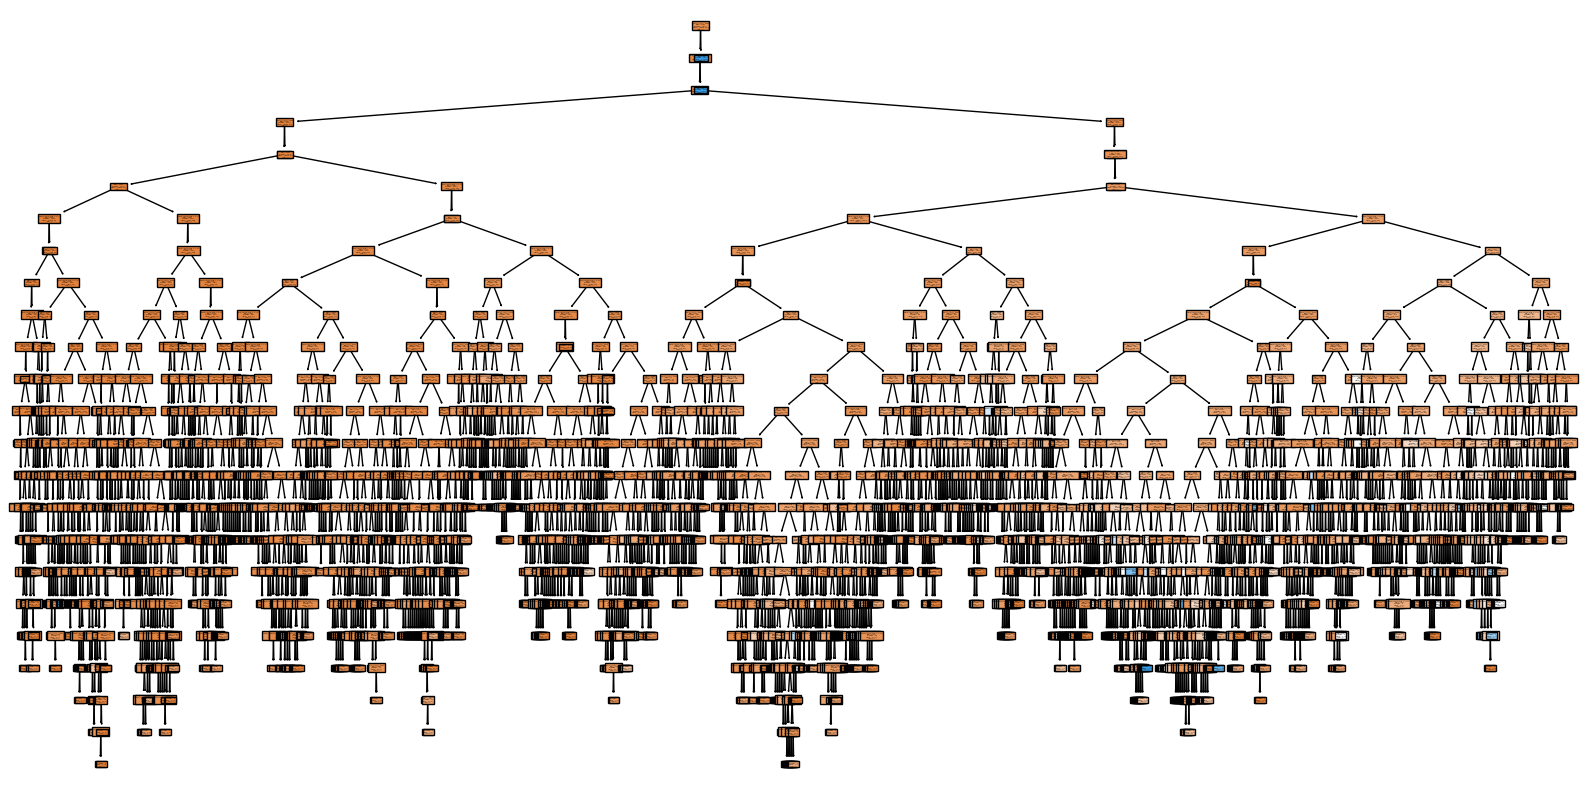

In [124]:
plt.figure(figsize=(20,10)) 
plot_tree(gini_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

In [125]:
entropy_decision_tree=DecisionTreeClassifier(criterion="entropy",random_state=42)
entropy_decision_tree.fit(x_train,y_train)
root_index=entropy_decision_tree.tree_.feature[0]

print("\nThe Root of The Decision Tree is : ",x.columns[root_index],"\n")

training_pediction=entropy_decision_tree.predict(x_train)
accuracy3=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction : ",accuracy3*100,"\n")

test_prediction=entropy_decision_tree.predict(x_test)
accuracy4=accuracy_score(y_test,test_prediction)
print("\nThe Accuracy of Testing Prediction : ",accuracy4*100,"\n")


The Root of The Decision Tree is :  HbA1c_level 


The Accuracy of Training Prediction :  97.32266666666666 


The Accuracy of Testing Prediction :  96.952 



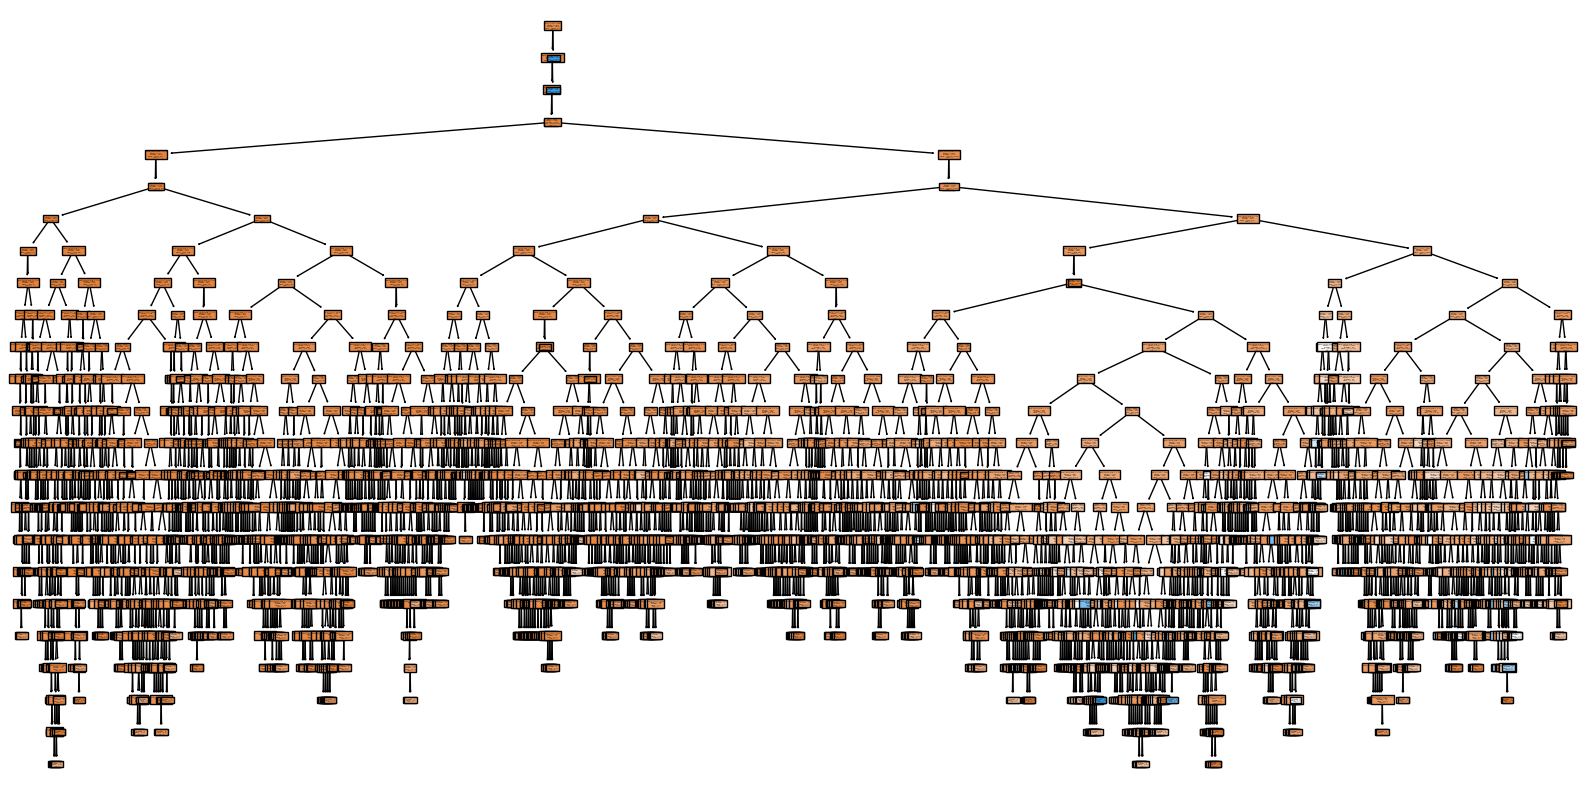

In [126]:
plt.figure(figsize=(20,10)) 
plot_tree(entropy_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

Select K Best  K=4

In [127]:
test=SelectKBest(score_func=f_classif,k=4)
fit=test.fit(x,y)
np.set_printoptions(precision=10)
model=fit.transform(x)

selected_indices=fit.get_support(indices=True)
selected_features=df.columns[selected_indices]

print("The Selected Fratures are : ",selected_features)

The Selected Fratures are :  Index(['gender', 'age', 'hypertension'], dtype='object')


c:\Users\SSN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=4 is greater than n_features=3. All the features will be returned.
  warnings.warn(


In [128]:
x = df[selected_features]
y = df["diabetes"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Size of The Training Dataset : ",x_train.shape)
print("Size of The Testing Dataset  : ",x_test.shape)

Size of The Training Dataset :  (75000, 3)
Size of The Testing Dataset  :  (25000, 3)


In [129]:
gini_decision_tree=DecisionTreeClassifier(criterion="gini",random_state=42)
gini_decision_tree.fit(x_train,y_train)
root_index=gini_decision_tree.tree_.feature[0]

print("\nThe Root of Gini Decision Tree is : ",x.columns[root_index],"\n")

training_prediction=gini_decision_tree.predict(x_train)
accuracy5=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction is : ",100*accuracy5,"\n")

testing_prediction=gini_decision_tree.predict(x_test)
accuracy6=accuracy_score(y_test,testing_prediction)
print("\nThe accuracy of Testing Dataset is    : ",100*accuracy6,"\n")


The Root of Gini Decision Tree is :  age 


The Accuracy of Training Prediction is :  91.53333333333333 


The accuracy of Testing Dataset is    :  91.4 



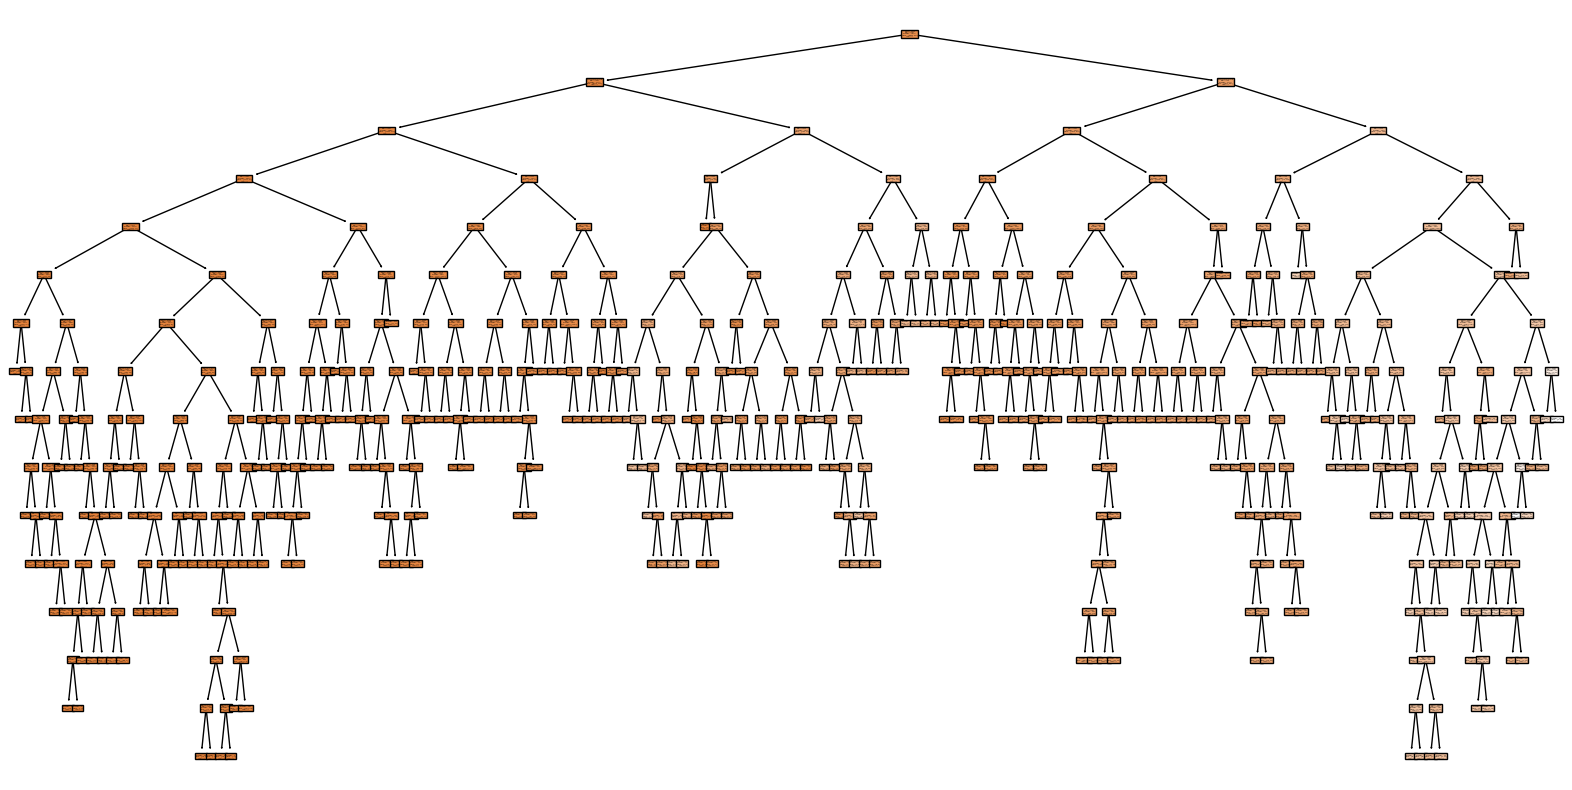

In [130]:
plt.figure(figsize=(20,10)) 
plot_tree(gini_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

In [131]:
entropy_decision_tree=DecisionTreeClassifier(criterion="entropy",random_state=42)
entropy_decision_tree.fit(x_train,y_train)
root_index=entropy_decision_tree.tree_.feature[0]

print("\nThe Root of The Decision Tree is : ",x.columns[root_index],"\n")

training_pediction=entropy_decision_tree.predict(x_train)
accuracy7=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction : ",accuracy7*100,"\n")

test_prediction=entropy_decision_tree.predict(x_test)
accuracy8=accuracy_score(y_test,test_prediction)
print("\nThe Accuracy of Testing Prediction : ",accuracy8*100,"\n")


The Root of The Decision Tree is :  age 


The Accuracy of Training Prediction :  91.53333333333333 


The Accuracy of Testing Prediction :  91.4 



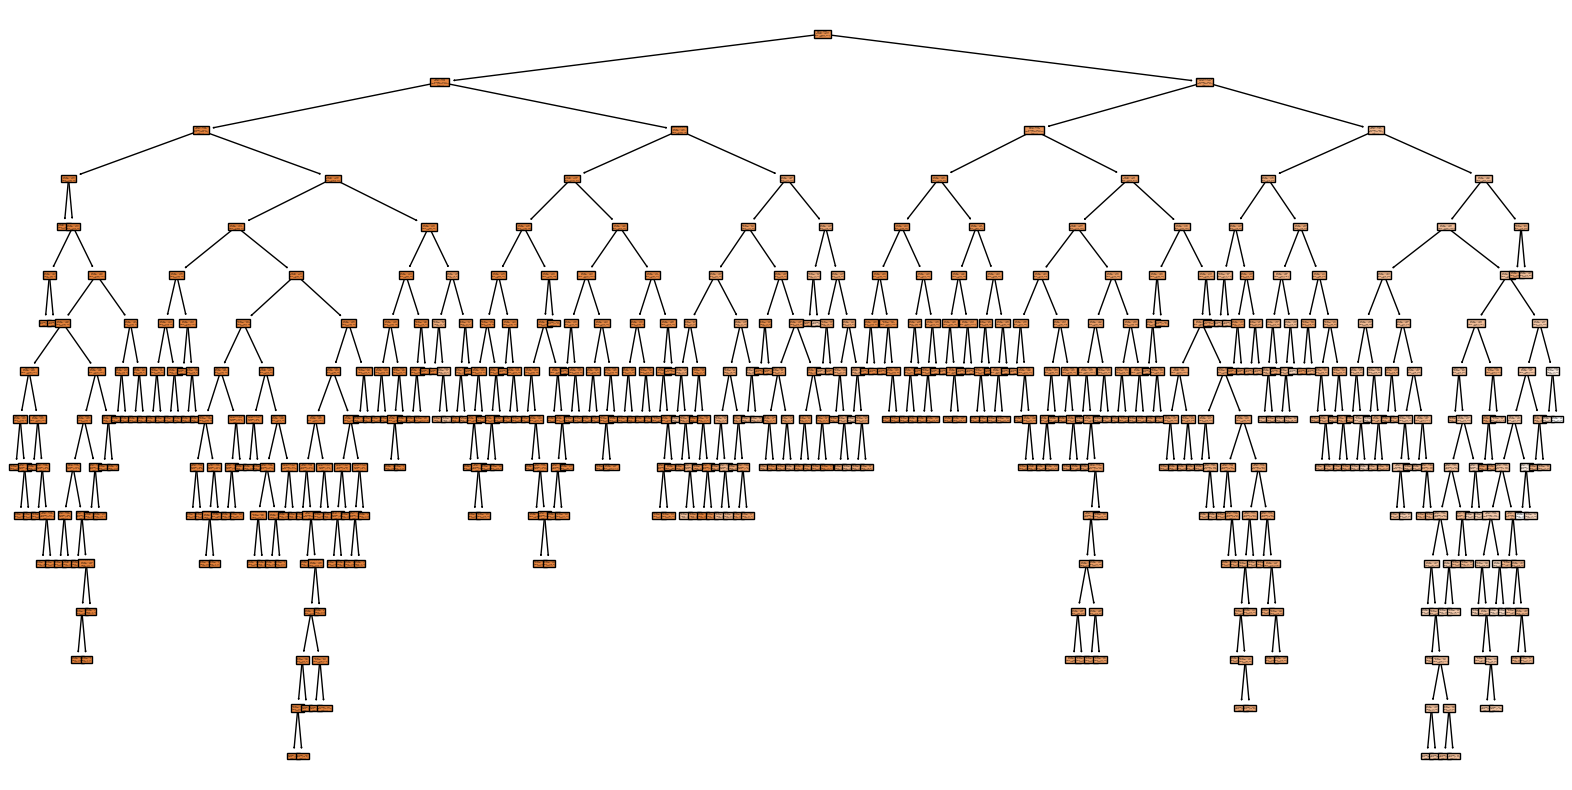

In [132]:
plt.figure(figsize=(20,10)) 
plot_tree(entropy_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

Select K Best  K=5

In [133]:
test=SelectKBest(score_func=f_classif,k=5)
fit=test.fit(x,y)
np.set_printoptions(precision=10)
model=fit.transform(x)

selected_indices=fit.get_support(indices=True)
selected_features=df.columns[selected_indices]

print("The Selected Fratures are : ",selected_features)

The Selected Fratures are :  Index(['gender', 'age', 'hypertension'], dtype='object')


c:\Users\SSN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=3. All the features will be returned.
  warnings.warn(


In [134]:
x = df[selected_features]
y = df["diabetes"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Size of The Training Dataset : ",x_train.shape)
print("Size of The Testing Dataset  : ",x_test.shape)

Size of The Training Dataset :  (75000, 3)
Size of The Testing Dataset  :  (25000, 3)


In [135]:
gini_decision_tree=DecisionTreeClassifier(criterion="gini",random_state=42)
gini_decision_tree.fit(x_train,y_train)
root_index=gini_decision_tree.tree_.feature[0]

print("\nThe Root of Gini Decision Tree is : ",x.columns[root_index],"\n")

training_prediction=gini_decision_tree.predict(x_train)
accuracy9=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction is : ",100*accuracy9,"\n")

testing_prediction=gini_decision_tree.predict(x_test)
accuracy10=accuracy_score(y_test,testing_prediction)
print("\nThe accuracy of Testing Dataset is    : ",100*accuracy10,"\n")


The Root of Gini Decision Tree is :  age 


The Accuracy of Training Prediction is :  91.53333333333333 


The accuracy of Testing Dataset is    :  91.4 



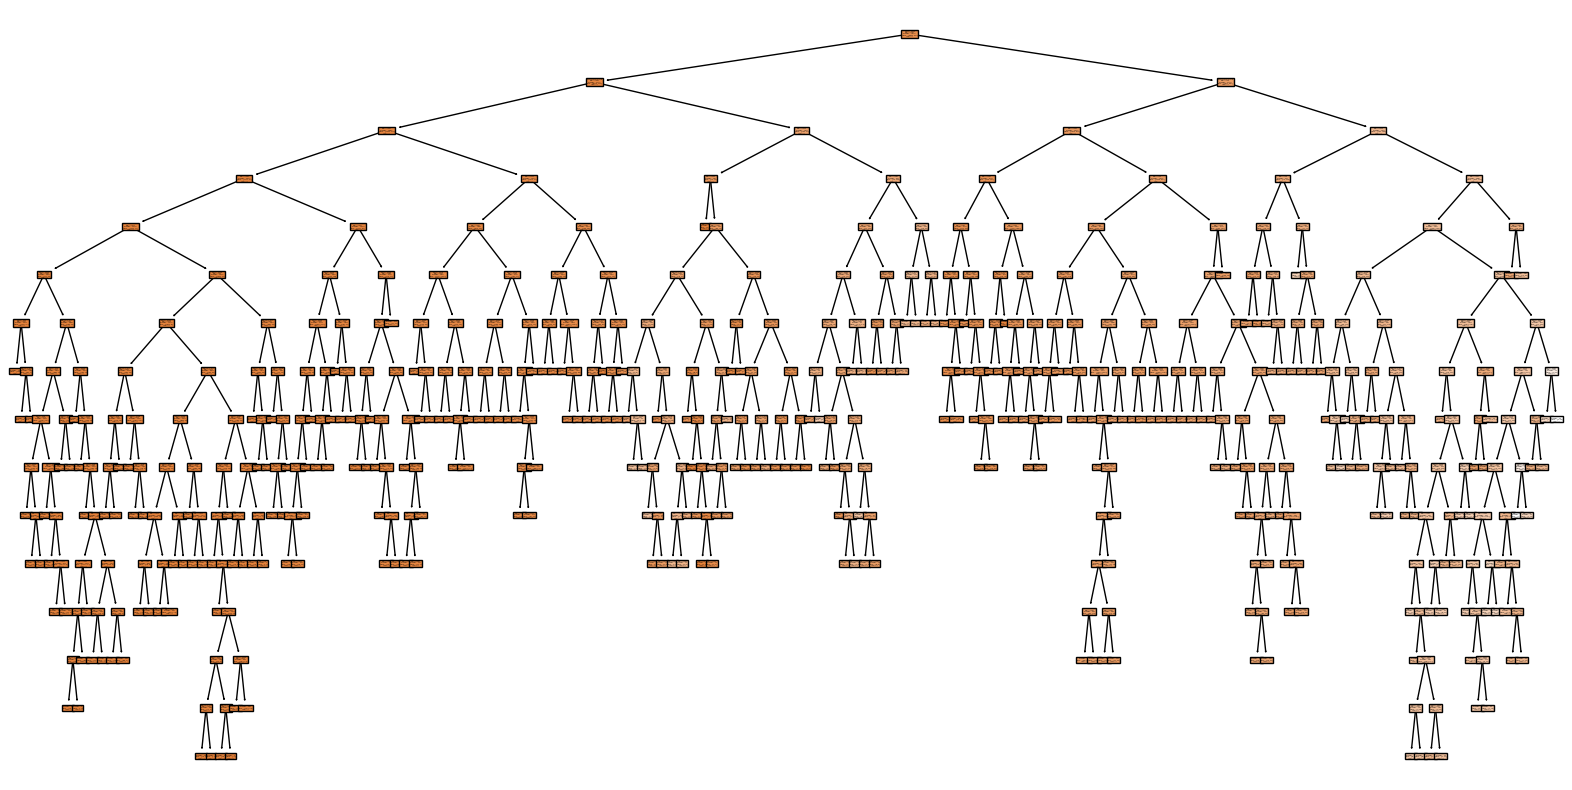

In [136]:
plt.figure(figsize=(20,10)) 
plot_tree(gini_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

In [137]:
entropy_decision_tree=DecisionTreeClassifier(criterion="entropy",random_state=42)
entropy_decision_tree.fit(x_train,y_train)
root_index=entropy_decision_tree.tree_.feature[0]

print("\nThe Root of The Decision Tree is : ",x.columns[root_index],"\n")

training_pediction=entropy_decision_tree.predict(x_train)
accuracy11=accuracy_score(y_train,training_prediction)
print("\nThe Accuracy of Training Prediction : ",accuracy11*100,"\n")

test_prediction=entropy_decision_tree.predict(x_test)
accuracy12=accuracy_score(y_test,test_prediction)
print("\nThe Accuracy of Testing Prediction : ",accuracy12*100,"\n")


The Root of The Decision Tree is :  age 


The Accuracy of Training Prediction :  91.53333333333333 


The Accuracy of Testing Prediction :  91.4 



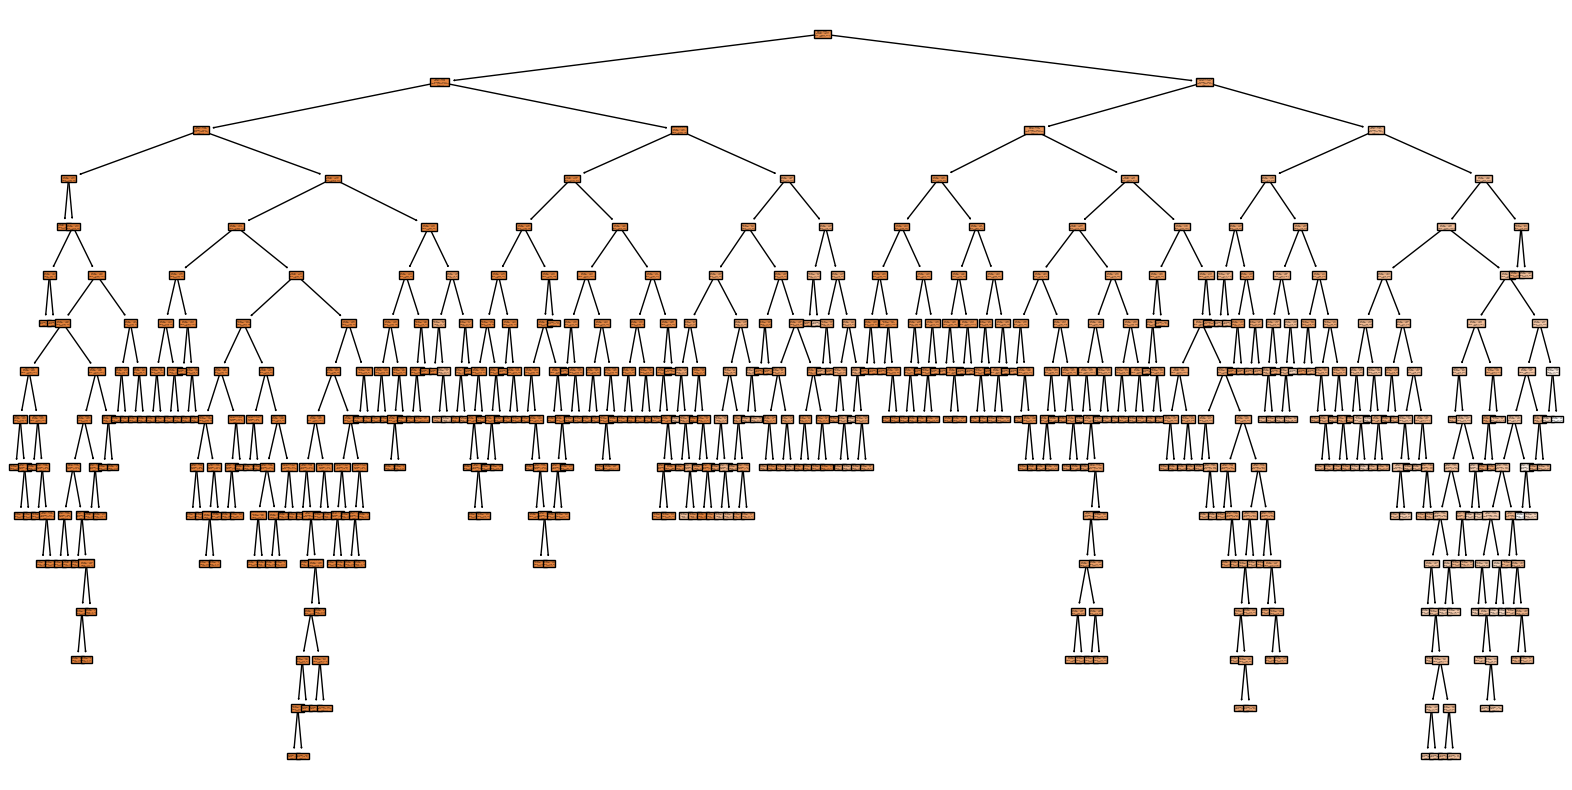

In [138]:
plt.figure(figsize=(20,10)) 
plot_tree(entropy_decision_tree, filled=True, feature_names=x.columns, class_names=["0", "1"])
plt.show()

Conclusion and Results

In [181]:
print()
print("                  The Accuracies of Different Decision Tree using Different Feature Selection Algorithms")
print()
print()
print("\t\t\t   Without Feature Selection          KBest (K = 3)         KBest (K = 4)       KBest (K = 5)")
print()
print("Gini Tree ( Training )   \t",round(accuracy13*100,2),"\t\t\t\t",round(accuracy1*100,2),"\t\t\t",round(accuracy5*100,2),"\t\t",round(accuracy9*100,2))
print()
print("Gini Tree ( Testing )   \t",round(accuracy14*100,2),"\t\t\t\t",round(accuracy2*100,2),"\t\t\t",round(accuracy6*100,2),"\t\t",round(accuracy10*100,2))
print()
print("Entropy Tree ( Training )   \t",round(accuracy15*100,2),"\t\t\t\t",round(accuracy3*100,2),"\t\t\t",round(accuracy7*100,2),"\t\t",round(accuracy11*100,2))
print()
print("Entropy Tree ( Testing )   \t",round(accuracy16*100,2),"\t\t\t\t",round(accuracy4*100,2),"\t\t\t",round(accuracy8*100,2),"\t\t",round(accuracy12*100,2))



                  The Accuracies of Different Decision Tree using Different Feature Selection Algorithms


			   Without Feature Selection          KBest (K = 3)         KBest (K = 4)       KBest (K = 5)

Gini Tree ( Training )   	 99.93 				 97.32 			 91.53 		 91.53

Gini Tree ( Testing )   	 95.28 				 96.95 			 91.4 		 91.4

Entropy Tree ( Training )   	 99.93 				 97.32 			 91.53 		 91.53

Entropy Tree ( Testing )   	 95.3 				 96.95 			 91.4 		 91.4


The Decision Tree model is bulit using the different Feature selection techniques

The accuracy is increased based on the no of features selected

The Decision tree model built using K Best ( K = 3 ) feature selection technique  gives the maximum Accuracy